***Tasks***


---







1.   Collect Dataset
2.   Preprocessing
3.   Feature Selection
4.   Applying Spam filter Algorithms
5.   Confusion Matrix











In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
dataset1 = pd.read_csv('/content/mail_data.csv')
dataset2 = pd.read_csv('/content/spam_or_not_spam.csv')

In [ ]:
dataset1.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
dataset2

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0
...,...,...
665,in a message dated NUMBER NUMBER NUMBER NUMBE...,0.0
666,well it looks like sun are going ahead with th...,0.0
667,on thu sep NUMBER NUMBER at NUMBER NUMBER NUM...,0.0
668,i m sure patton used it i m all for using it i...,0.0


**Pre-Processing or Data Cleaning**

In [ ]:
#checking is null values exit in our datasets
print(dataset1.isna().sum())
print(dataset2.isna().sum())
dataset1['Category'].value_counts()
dataset2['label'].value_counts()

Category    2
Message     6
dtype: int64
email    0
label    1
dtype: int64


0.0    669
Name: label, dtype: int64

In [ ]:
#droping all the records which comtains null values
dataset1.dropna(inplace=True)
dataset2.dropna(inplace=True)
print(dataset1.shape)
print(dataset2.shape)

(5573, 2)
(669, 2)


**First I will label encode dataset1 and change their columns name in order to merge to csv.**

In [ ]:
#encoding our category variable into 0 and 1
label_encoder = LabelEncoder()
dataset1['Category'] = label_encoder.fit_transform(dataset1['Category'])
dataset1

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [ ]:
print(dataset1['Category'].unique())
print(dataset2['label'].unique())
dataset1['Category'].value_counts()

[0 1]
[0.]


0    4825
1     748
Name: Category, dtype: int64

Now i would change columns name

In [ ]:
#changing names of the columns in dataset1 + ordering them  so that we can cocatenate with dataset2
column_name = {
    'Category': 'label',
    'Message': 'email'
}

dataset1 = dataset1.rename(columns=column_name)
dataset1 = dataset1.reindex(columns=['email', 'label'])
dataset1
print(dataset1['label'].unique())


[0 1]


In [ ]:
#creating a single dataset y mergiing dataset 1 and dataset 2
email_dt = pd.concat([dataset1, dataset2])


In [ ]:
#Duplicates values checking  and dropping the row that duplicates
print('Number of duplicates',email_dt.duplicated().sum())
email_dt.drop_duplicates(inplace=True)
print(email_dt.shape)
print(email_dt['label'].unique())


Number of duplicates 418
(5824, 2)
[0. 1.]


In [ ]:
# remove symbols or usless text
email_dt.email = email_dt.email.apply(lambda a: re.sub('_{1,}|NUMBER','',a))

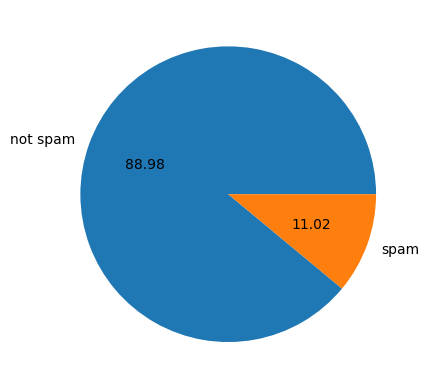

In [ ]:
plt.pie(email_dt['label'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

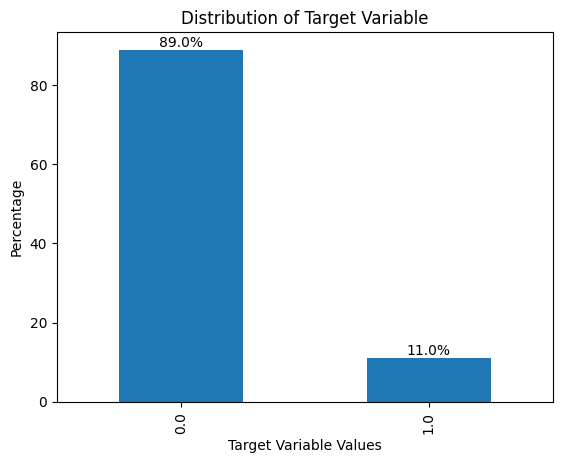

In [ ]:
value_counts = email_dt['label'].value_counts()
percentage_values = value_counts / len(email_dt) * 100

ax = percentage_values.plot(kind='bar')

plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable Values')
plt.ylabel('Percentage')

for i, v in enumerate(percentage_values):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom')


plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
email_dt['total_chr'] = email_dt['email'].apply(len)
email_dt['total_words'] = email_dt['email'].apply(lambda x : len(nltk.word_tokenize(x)))
email_dt['total_sentences'] = email_dt['email'].apply(lambda x : len(nltk.sent_tokenize(x)))
email_dt

,email,label,total_chr,total_words,total_sentences
0,"Go until jurong point, crazy.. Available only ...",0.0,111,24,2
1,Ok lar... Joking wif u oni...,0.0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1.0,155,37,2
3,U dun say so early hor... U c already then say...,0.0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0.0,61,15,1
...,...,...,...,...,...
664,forwarded message date sep from perry e...,0.0,428,69,1
665,in a message dated pm dl URL writes i d...,0.0,369,74,1
666,well it looks like sun are going ahead with th...,0.0,2342,402,1
667,on thu sep at am bill stoddard wrote peo...,0.0,2344,443,1


In [ ]:
email_dt[['total_chr', 'total_words', 'total_sentences']].describe()

,total_chr,total_words,total_sentences
count,5824.000000,5824.000000,5824.000000
mean,235.617273,46.331387,1.858860
std,951.534159,171.962582,1.403975
min,2.000000,1.000000,1.000000
25%,38.000000,10.000000,1.000000
50%,71.000000,17.000000,1.000000
75%,144.000000,31.000000,2.000000
max,38398.000000,7361.000000,38.000000


In [ ]:
print(email_dt[email_dt['label'] == 0][['total_chr', 'total_words', 'total_sentences']].describe())
print(email_dt[email_dt['label'] == 1][['total_chr', 'total_words', 'total_sentences']].describe())

          total_chr  total_words  total_sentences
count   5182.000000  5182.000000      5182.000000
mean     247.831725    48.645697         1.721343
std     1008.039231   182.155340         1.330794
min        2.000000     1.000000         1.000000
25%       36.000000     9.000000         1.000000
50%       62.000000    15.000000         1.000000
75%      126.000000    30.000000         2.000000
max    38398.000000  7361.000000        38.000000
        total_chr  total_words  total_sentences
count  642.000000    642.00000       642.000000
mean   137.026480     27.65109         2.968847
std     30.438105      7.10780         1.484910
min      7.000000      2.00000         1.000000
25%    130.000000     25.00000         2.000000
50%    148.000000     29.00000         3.000000
75%    156.750000     32.00000         4.000000
max    223.000000     46.00000         9.000000


<Axes: xlabel='total_words', ylabel='Count'>

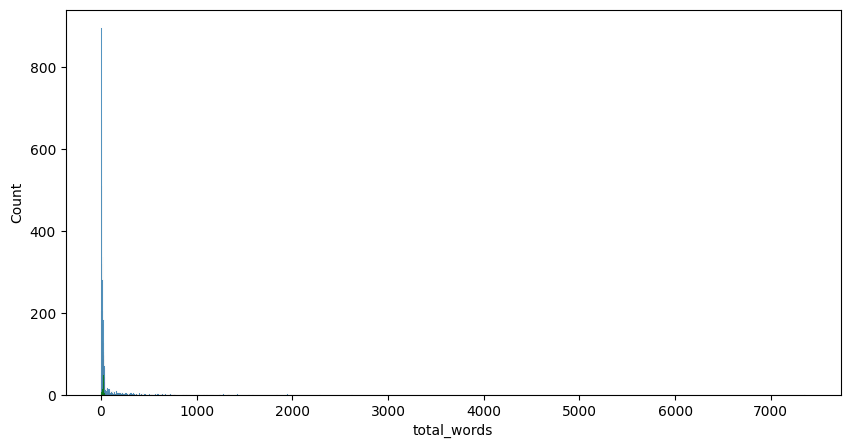

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(email_dt[email_dt['label'] == 0]['total_words'])
sns.histplot(email_dt[email_dt['label'] == 1]['total_words'], color='green')

<Axes: xlabel='total_sentences', ylabel='Count'>

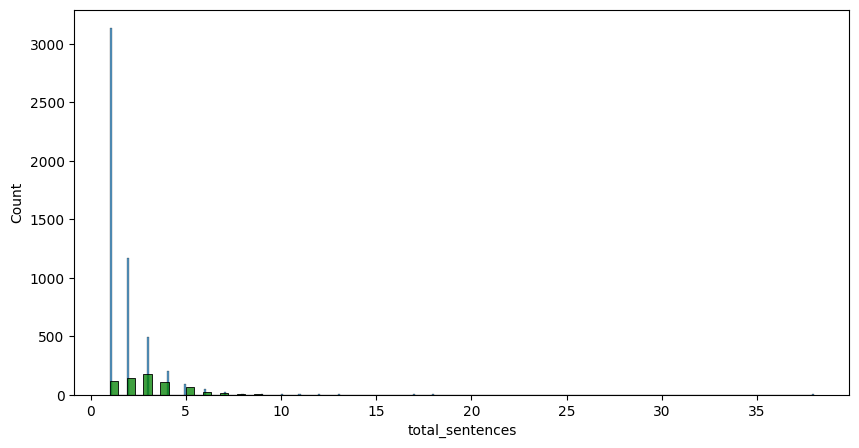

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(email_dt[email_dt['label'] == 0]['total_sentences'])
sns.histplot(email_dt[email_dt['label'] == 1]['total_sentences'], color='green')

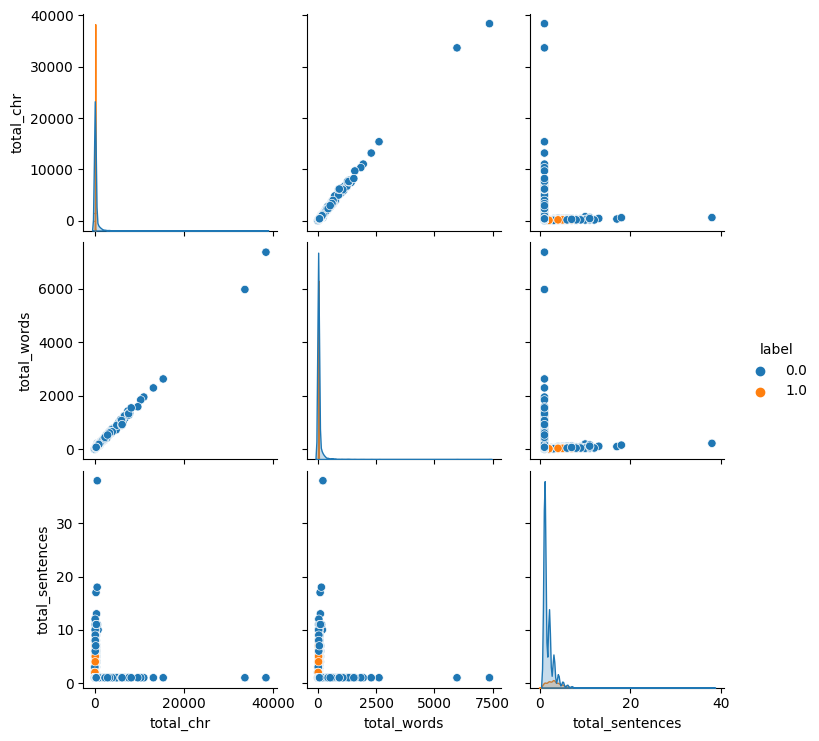

In [ ]:
sns.pairplot(email_dt, hue='label')

<ipython-input-24-70d822c25b9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(email_dt.corr(), annot=True)


<Axes: >

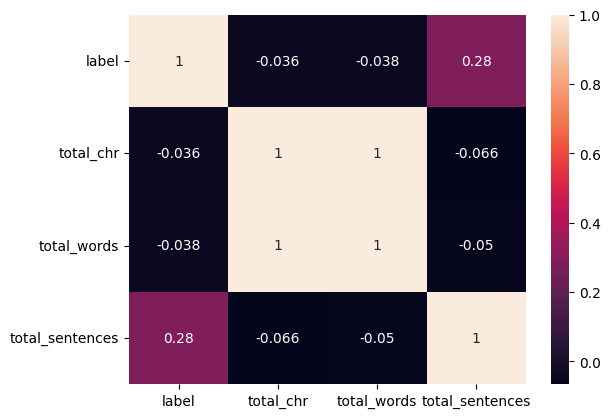

In [ ]:
sns.heatmap(email_dt.corr(), annot=True)

**Pre Processing the data more**


> Lower case

> Tokenize

> Removing special characker

> Removing stop words and puntuation

> Stemming












In [ ]:
#in one function i will fuifill all above tasks
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

def data_preprocessing(email_text):
  emaill_text = email_text.lower()
  email_text =nltk.word_tokenize(email_text)

  temp_list = []
  for i in email_text:
    if i.isalnum():
      temp_list.append(i)

  email_text = temp_list[:]
  temp_list.clear()
  for i in email_text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      temp_list.append(i)
  email_text = temp_list[:]
  return " ".join(email_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_preprocessing('well it looks like sun are going ahead with th...	')


'well looks like sun going ahead th'

In [ ]:
email_dt['refined_text'] = email_dt['email'].apply(data_preprocessing)
email_dt

,email,label,total_chr,total_words,total_sentences,refined_text
0,"Go until jurong point, crazy.. Available only ...",0.0,111,24,2,Go jurong point crazy Available bugis n great ...
1,Ok lar... Joking wif u oni...,0.0,29,8,2,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1.0,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0.0,49,13,1,U dun say early hor U c already say
4,"Nah I don't think he goes to usf, he lives aro...",0.0,61,15,1,Nah I think goes usf lives around though
...,...,...,...,...,...,...
664,forwarded message date sep from perry e...,0.0,428,69,1,forwarded message date sep perry e metzger per...
665,in a message dated pm dl URL writes i d...,0.0,369,74,1,message dated pm dl URL writes mind people adv...
666,well it looks like sun are going ahead with th...,0.0,2342,402,1,well looks like sun going ahead ubiquitous com...
667,on thu sep at am bill stoddard wrote peo...,0.0,2344,443,1,thu sep bill stoddard wrote people either folk...


In [ ]:
#now i will see top 100 words that repeatively comes in spam messages
spam_corpus = []
print(email_dt[email_dt['refined_text'] == 1])
for mails in email_dt[email_dt['label'] == 1]['refined_text'].tolist():
  for word in mails.split():
    spam_corpus.append(word)

len(spam_corpus)

Empty DataFrame
Columns: [email, label, total_chr, total_words, total_sentences, refined_text]
Index: []


10669

In [ ]:
from collections import Counter
most_common_words=pd.DataFrame(Counter(spam_corpus).most_common(50))
most_common_words

,0,1
0,call,159
1,2,156
2,Call,116
3,4,97
4,FREE,95
5,ur,86
6,mobile,78
7,U,75
8,You,69
9,claim,67


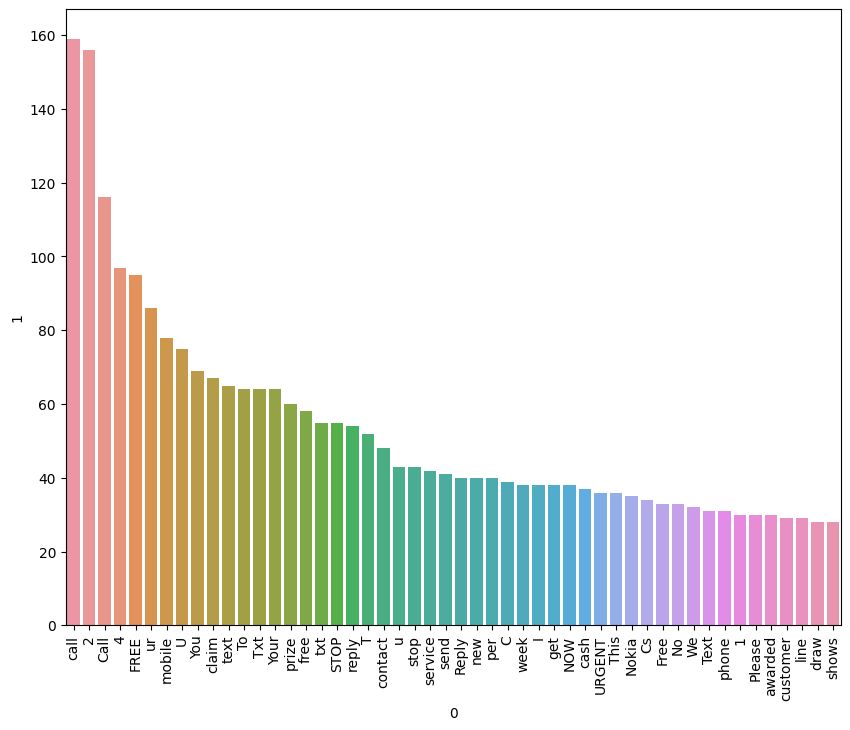

In [ ]:
#now visualizing this dataset
plt.figure(figsize=(10,8))
sns.barplot(data=most_common_words, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#similarly for not spam emails
not_spam_corpus = []
print(email_dt[email_dt['label'] == 0]['refined_text'].tolist())
for mails in email_dt[email_dt['label'] == 0]['refined_text'].tolist():
  for word in mails.split():
    not_spam_corpus.append(word)

len(not_spam_corpus)


['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat', 'Ok lar Joking wif u oni', 'U dun say early hor U c already say', 'Nah I think goes usf lives around though', 'Even brother like speak They treat like aids patent', 'As per request Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press 9 copy friends Callertune', 'I gon na home soon want talk stuff anymore tonight k I cried enough today', 'I searching right words thank breather I promise wont take help granted fulfil promise You wonderful blessing times', 'I HAVE A DATE ON SUNDAY WITH WILL', 'Oh k watching', 'Eh u remember 2 spell name Yes He v naughty make v wet', 'Fine way u feel way gota b', 'Is seriously spell name', 'I going try 2 months ha ha joking', 'So ü pay first lar Then da stock comin', 'Aft finish lunch go str lor Ard 3 smth lor U finish ur lunch already', 'Ffffffffff Alright way I meet sooner', 'Just forced eat slice I really hungry tho This sucks Mark getting worried He 

138142

In [ ]:
most_common_words2=pd.DataFrame(Counter(not_spam_corpus).most_common(70))
most_common_words2

,0,1
0,URL,1827
1,I,1798
2,u,681
3,one,644
4,get,603
...,...,...
65,information,189
66,unsubscribe,189
67,message,188
68,love,186


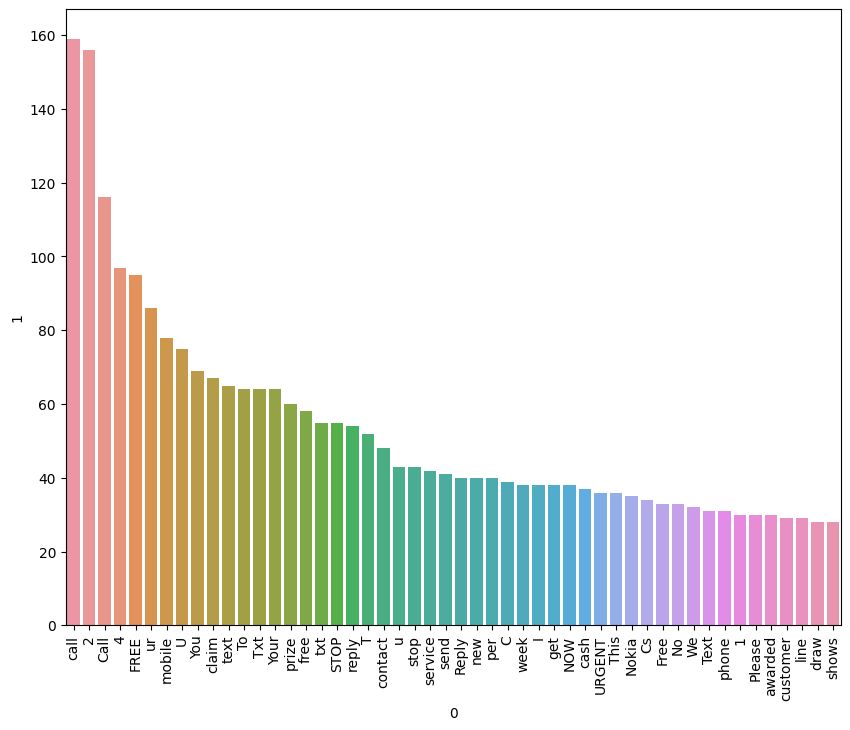

In [ ]:
#now visualizing this dataset
plt.figure(figsize=(10,8))
sns.barplot(data=most_common_words, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()



**Our target variable is quite imbalnace and i will use technique to balance the target varibales **

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Separate the features and target variable
X = email_dt.drop('email', axis=1)  # Select all columns except the last one as features
y = email_dt['label']   # Select the last column as the target variable

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling on the target variable
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the class distribution after oversampling
unique_counts = pd.Series(y_resampled).value_counts()
print(unique_counts)
print(X_resampled.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
b=email_dt['label'].values

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
a = feature_extraction.fit_transform(email_dt['refined_text']).toarray()

#total_sentences = email_dt['total_sentences'].values.reshape(-1,1)
#total_chr = email_dt['total_chr'].values.reshape(-1,1)
#a = np.hstack((a, total_sentences))
#a = np.hstack((a, total_chr))

X_train, X_test, Y_train, Y_test= train_test_split(a, b, test_size=0.3, random_state=3)
#x_train, x_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=3)
print( X_train.shape, " ", a.shape, " ",b.shape )

(4076, 19228)   (5824, 19228)   (5824,)


		RANDOM FOREST MODEL TRAINING ...... 

Training Accuracy of Model is: 100.0
Testing Accuracy of Model is: 96.85354691075516
Training Precision of Model is: 100.0
Testing Precision of Model is: 96.85354691075516
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3624
         1.0       1.00      1.00      1.00       452

    accuracy                           1.00      4076
   macro avg       1.00      1.00      1.00      4076
weighted avg       1.00      1.00      1.00      4076

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1558
         1.0       0.99      0.72      0.83       190

    accuracy                           0.97      1748
   macro avg       0.98      0.86      0.91      1748
weighted avg       0.97      0.97      0.97      1748



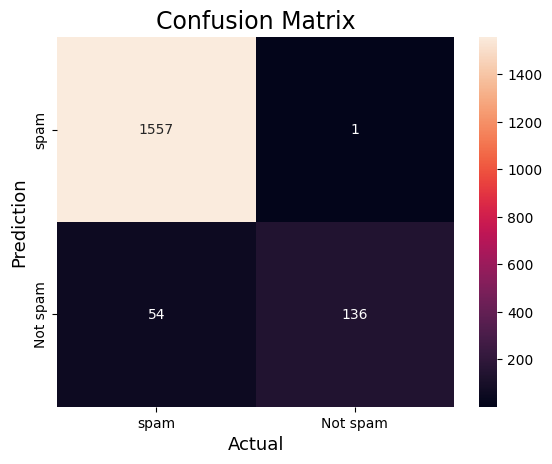

		RANDOM FOREST MODEL TRAINING END...... 



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import seaborn as sns

accuracy=[]
precision=[]
models = []
#model1= GaussianNB()
#model2 = MultinomialNB()
#model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
#model5 = BernoulliNB()

#models.append(["\t\tGuassian NB model training ....".upper(), model1, "\t\tGuassian NB model training End....".upper()])
#models.append(["\t\tMultinominal NB model training ....".upper() , model2, "\t\tMultinominal NB model training End ....".upper()])
#models.append(["\t\tDecision Tree or J48 model Training ....".upper() , model3, "\t\tDecision Tree or J48 model Training End....".upper()])
models.append(["\t\tRandom Forest Model Training ......".upper() , model4, "\t\tRandom Forest Model Training End......".upper()])
#models.append(["\t\tBernoulli NB Model Training ......".upper() , model5, "\t\tBernoulli NB Model Training End......".upper()])

def conf_matrix( model_y_pred):
  cm = confusion_matrix(Y_test,model_y_pred)

  #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g',
              xticklabels=['spam','Not spam'],
              yticklabels=['spam','Not spam'])
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()

def model_score(model_y_train_pred, model_y_test_pred):
  training_acc= accuracy_score(Y_train, model_y_train_pred)*100
  testing_acc = accuracy_score(Y_test, model_y_test_pred)*100
  training_pre = precision_score(Y_train, model_y_train_pred)*100
  testing_pre = precision_score(Y_test, model_y_test_pred)*100
  print(f"Training Accuracy of Model is: {training_acc}")
  print(f"Testing Accuracy of Model is: {testing_acc}")
  print(f"Training Precision of Model is: {training_acc}")
  print(f"Testing Precision of Model is: {testing_acc}")
  accuracy.append(testing_acc)
  precision.append(testing_pre)

def model_report(model_y_train_pred, model_y_test_pred):
  print(classification_report(Y_train, model_y_train_pred))
  print(classification_report(Y_test, model_y_test_pred))


for model in models:
  print(model[0], "\n")
  model[1].fit(X_train, Y_train)
  model_y_train_pred = model[1].predict(X_train)
  model_y_test_pred = model[1].predict(X_test)
  model_score(model_y_train_pred, model_y_test_pred)
  model_report(model_y_train_pred,model_y_test_pred)
  conf_matrix(model_y_test_pred)
  print(model[2], "\n")


In [ ]:
all_models = ['Guassian NB', 'Multinomial NB' ,'Decision Tree', 'Random Forest', 'Bernoulli NB']
df = pd.DataFrame({'Models': all_models, 'Accuracy': accuracy, 'Precision': precision})
df


,Models,Accuracy,Precision
0,Guassian NB,80.365297,38.535032
1,Multinomial NB,90.078871,100.000000
2,Decision Tree,94.645081,82.467532
3,Random Forest,96.264010,99.585062
4,Bernoulli NB,87.131590,57.142857


In [ ]:
input_mail = "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"

input_mail = data_preprocessing(input_mail)
print(input_mail)
# convert text to feature vectors
input_data_features = feature_extraction.fit_transform(input_mail)

# making prediction

prediction = model4.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

ValueError: ignored